In [1]:
# basic plotting imports
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # high res plotting

import mne
from mne import io
 
import numpy as np

from neurodsp import filt
from neurodsp import spectral

from fooof import FOOOF

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(12,9)})
sns.set_style('whitegrid')
sns.set_style("whitegrid", {'axes.grid' : False})


Using matplotlib as 2D backend.
Opening raw-browser...


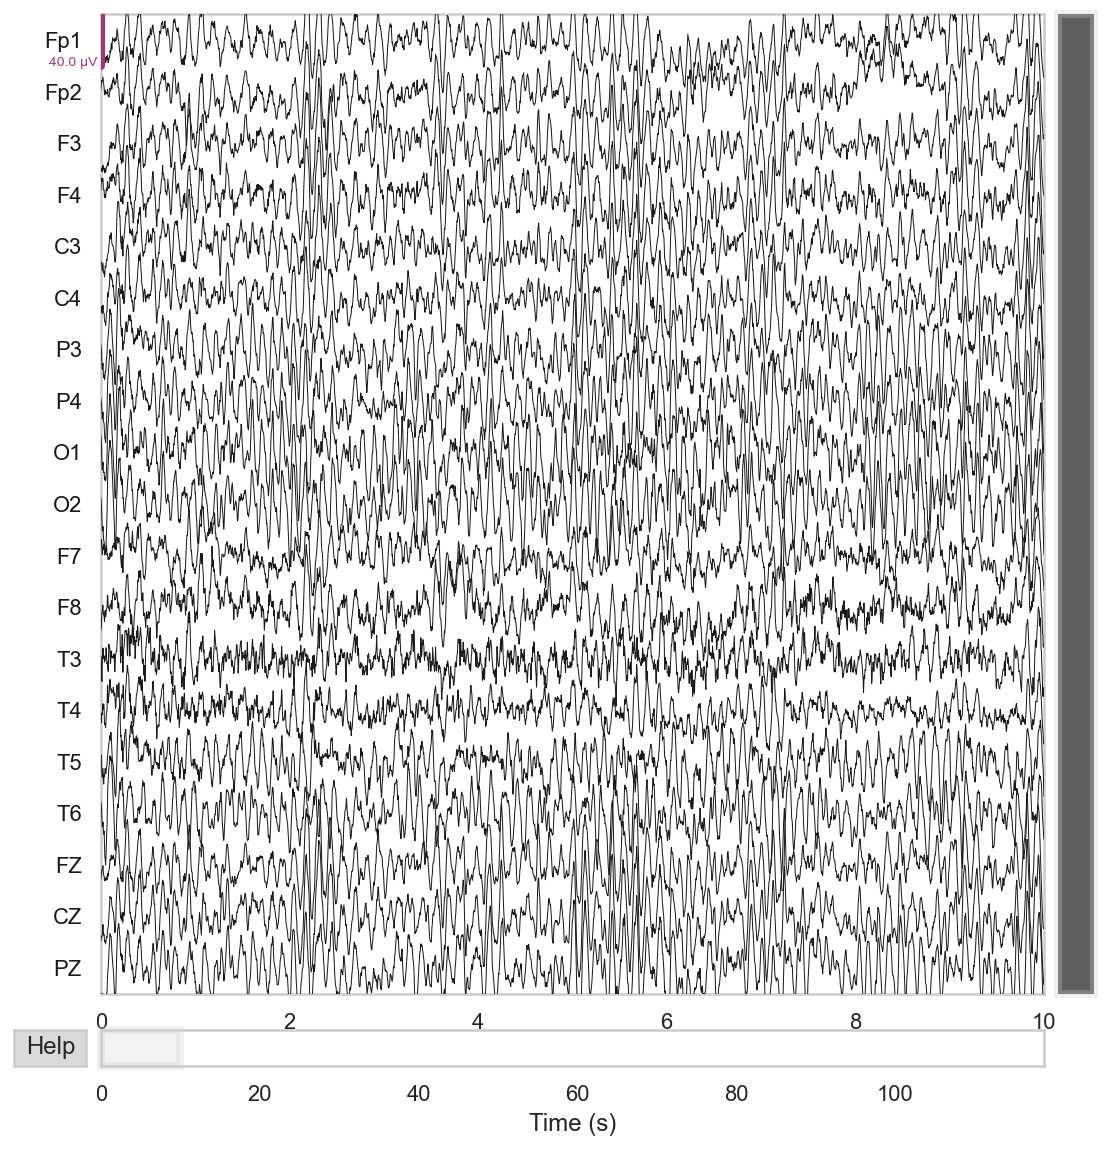

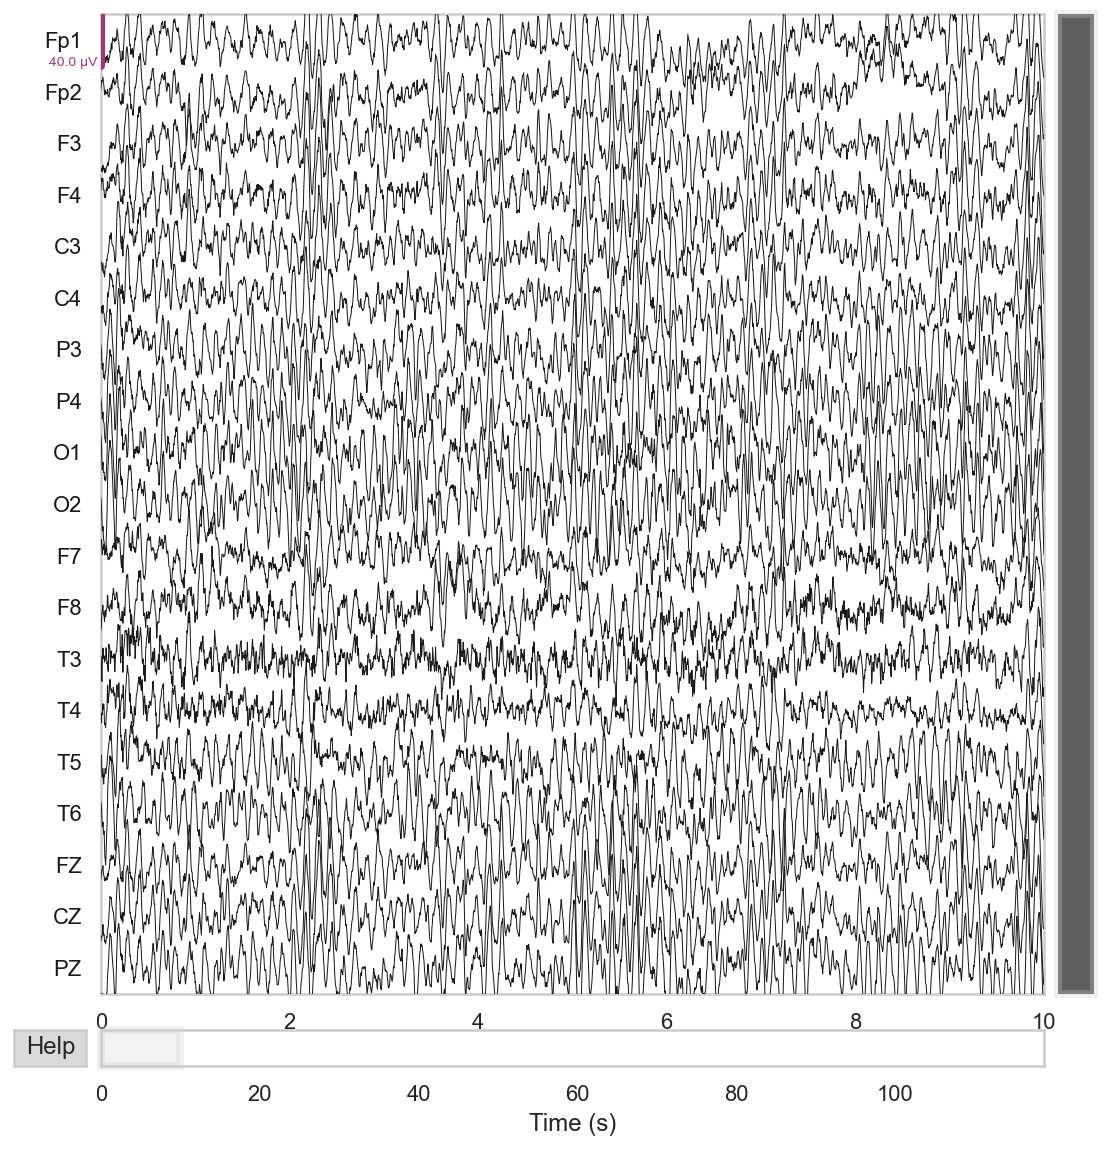

In [2]:
# import the eyes closed data, and plot
eyes_closed = io.read_raw_eeglab('data/eeg/MichaelECxdf.set', preload=True)
mne.viz.plot_raw(eyes_closed)


In [3]:
fs = eyes_closed.info['sfreq'] # sampling rate from mne structure

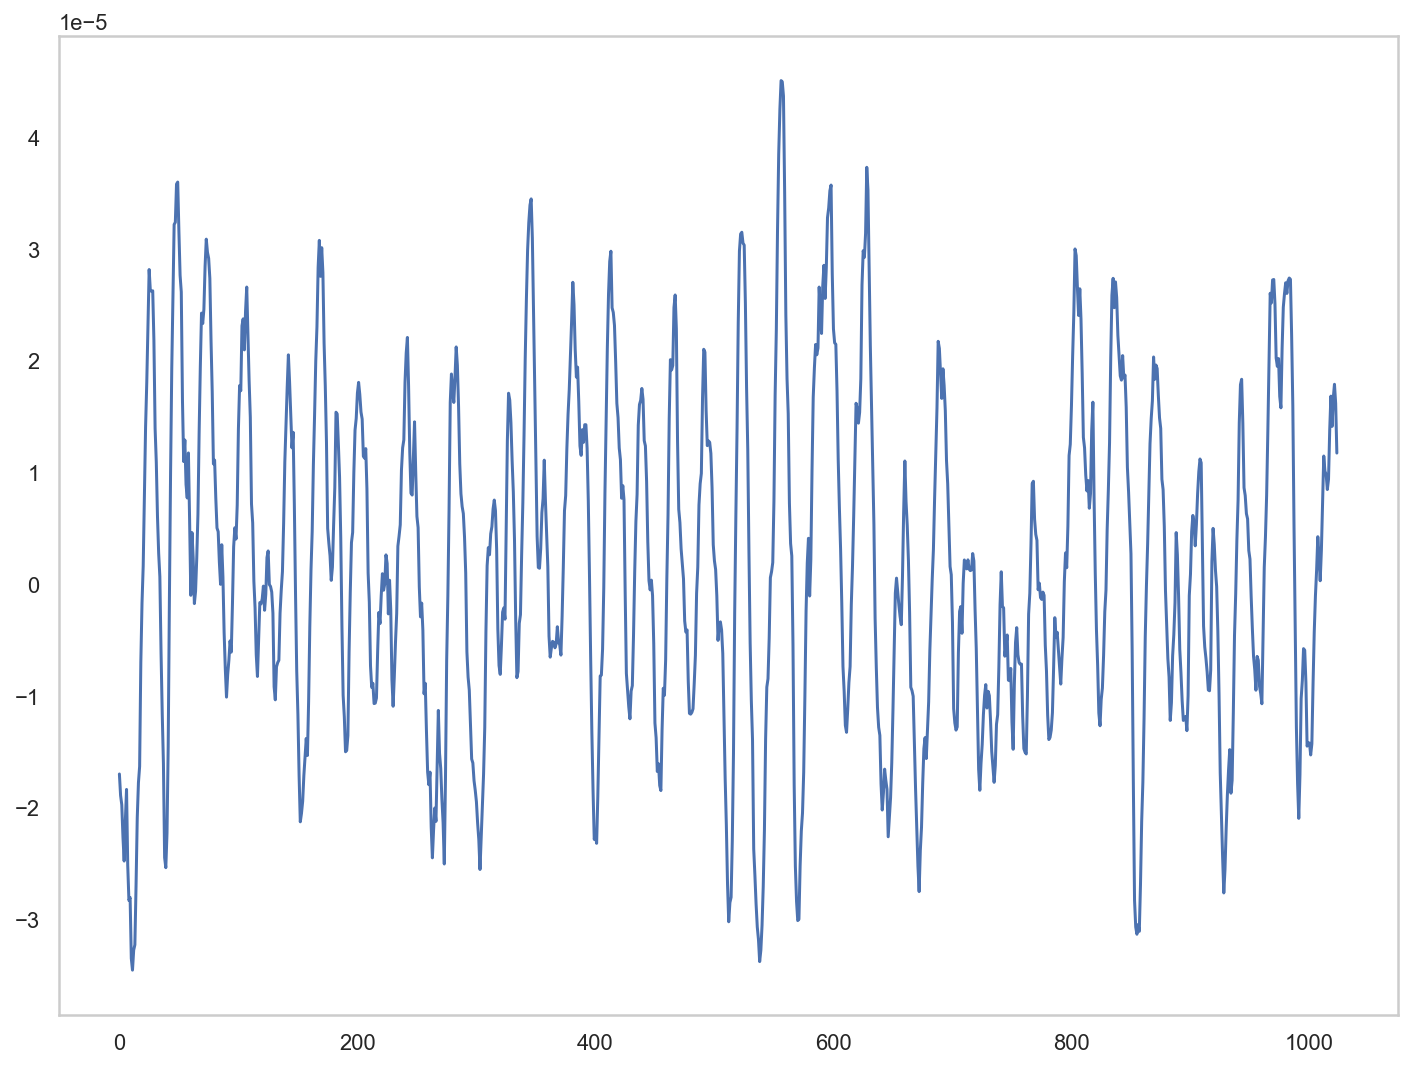

In [4]:
# extract the raw data array from the mne structure

data_array = eyes_closed.get_data()

chan_idx = 18 # Pz
pz = data_array[chan_idx, :] # let's just look at channel Cz

plt.plot(pz[0:1024])
plt.show()

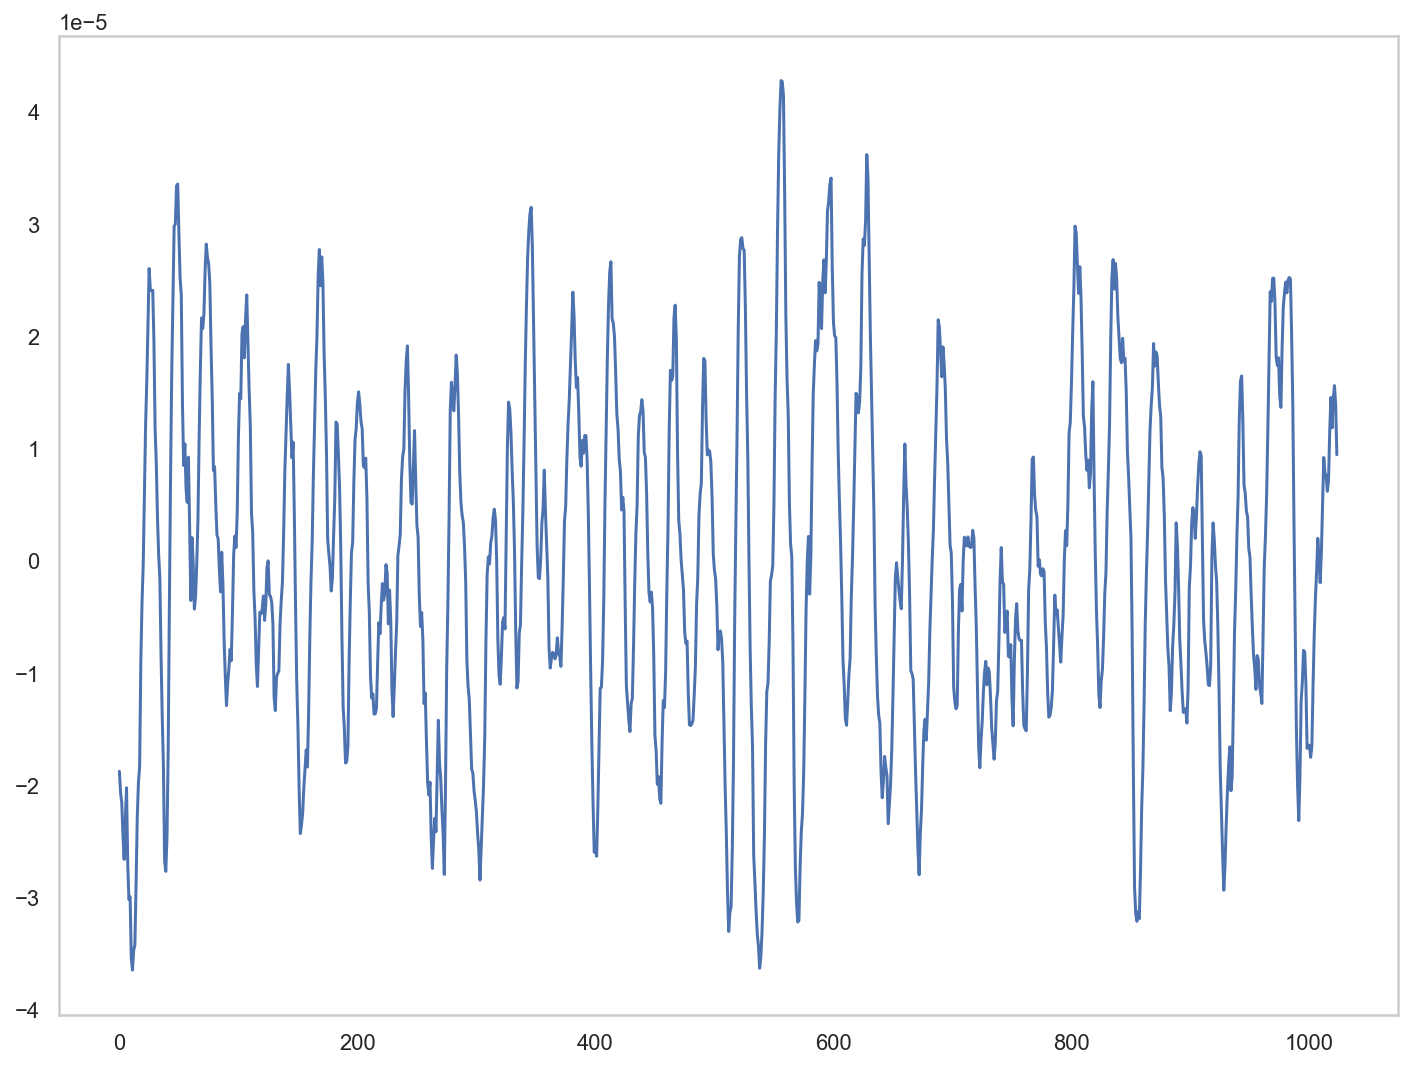

In [5]:
# highpass filter Pz
pz_filt = filt.filter_signal(pz, fs=fs, pass_type='highpass',
                filter_type='fir', f_range=0.5, remove_edges=False)

plt.plot(pz_filt[0:1024])
plt.show()

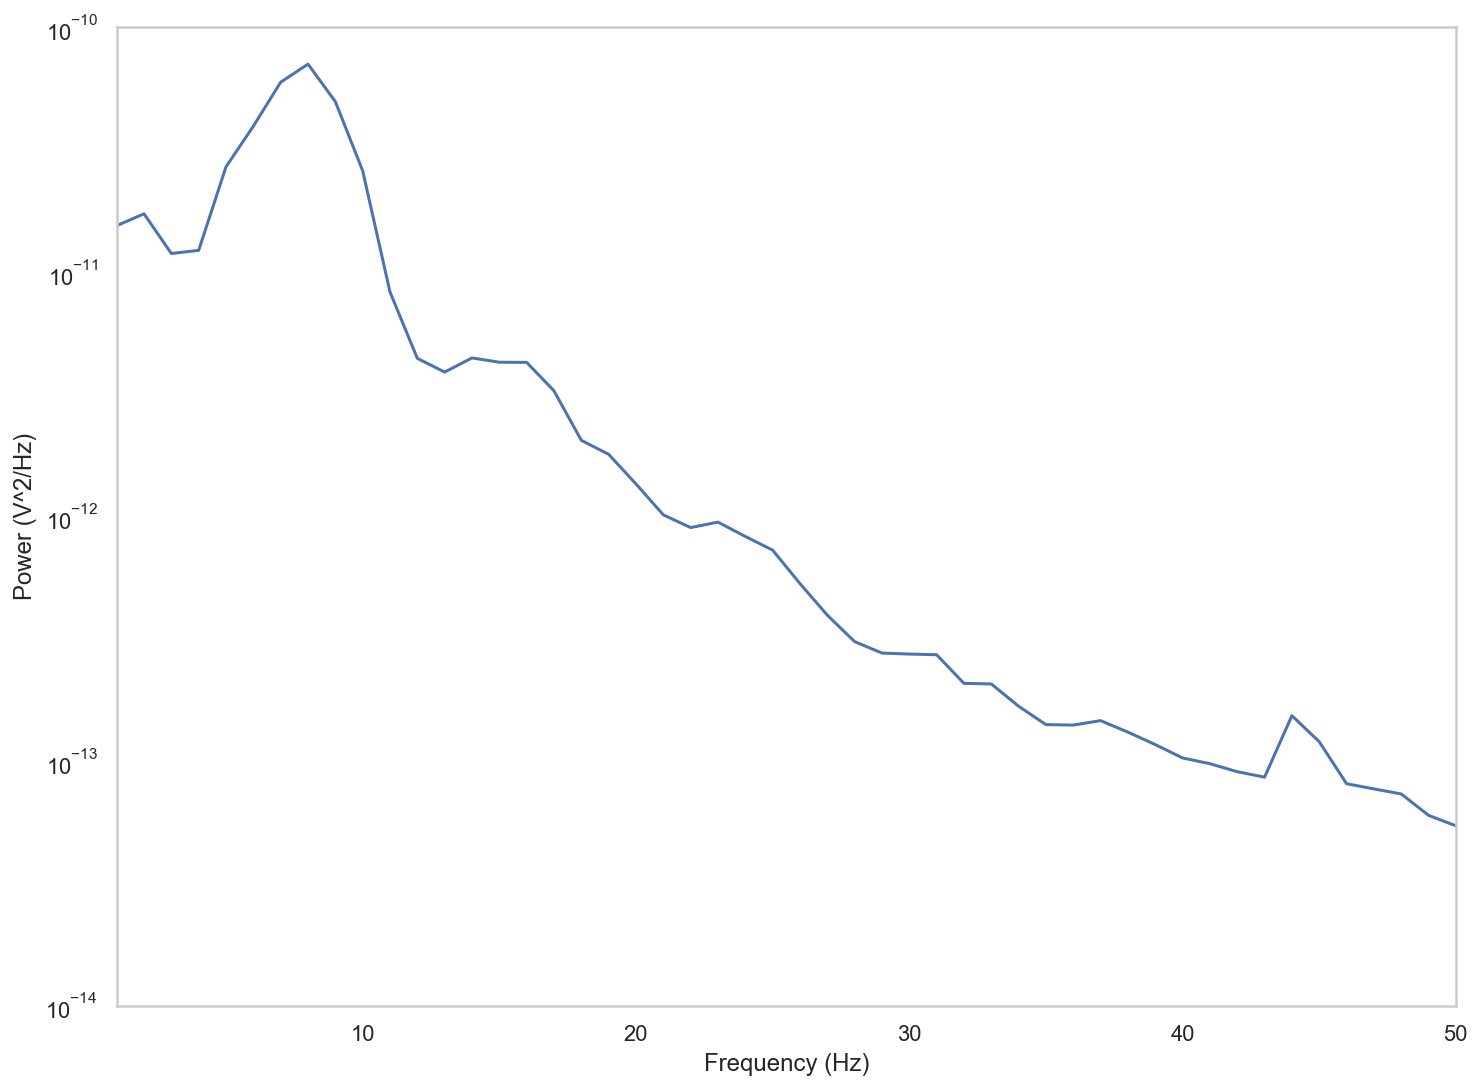

In [6]:
# estimate the PSD
fxx, pxx = spectral.compute_spectrum(pz_filt, fs, method='welch',
                                              window='hann', nperseg=fs)

plt.semilogy(fxx, pxx)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (V^2/Hz)')
plt.xlim((1, 50))
plt.ylim((10e-15, 10e-11))
plt.show()


FOOOF WARNING: Lower-bound peak width limit is < or ~= the frequency resolution: 1.00 <= 0.50
	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                   FOOOF - POWER SPECTRUM MODEL                                   
                                                                                                  
                        The model was run on the frequency range 1 - 50 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
                                                                                                  
                         Aperiodic Parameters (offset,

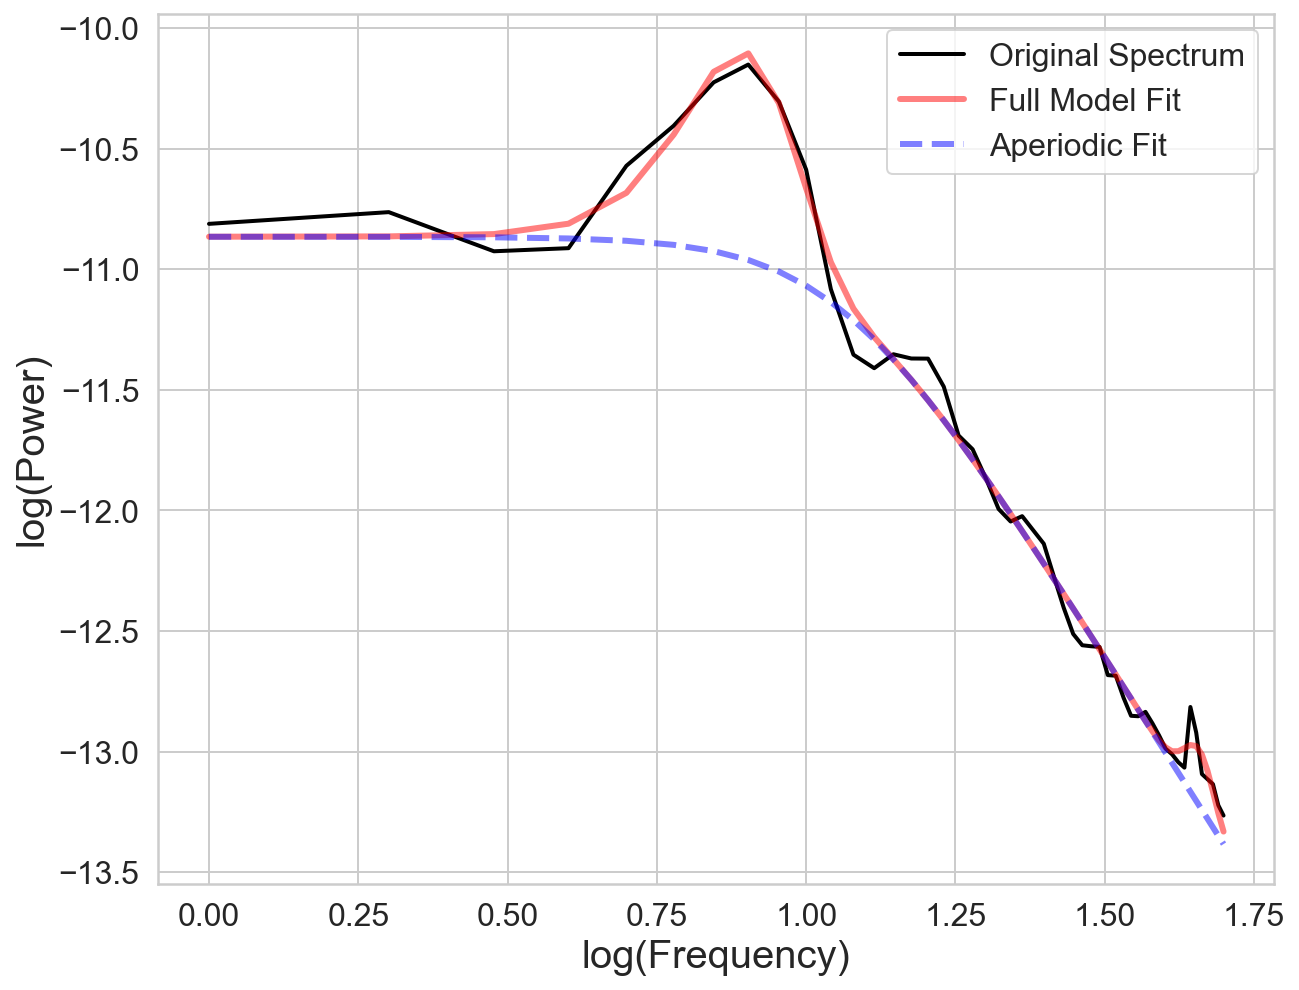

In [7]:
# Parameterize the data!
# Initialize a FOOOF object
fm = FOOOF(aperiodic_mode='knee')

# Set the frequency range to fit the model
freq_range = [0.5, 50]

# Report: fit the model, print the resulting parameters, and plot the reconstruction
fm.report(fxx, pxx, freq_range, plt_log=True)